In [2]:
#Loading the appropriate Lib
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_iag = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('British Airways since:2021-01-01 until:2021-06-30').get_items()):
    tweets_iag.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location, tweet.user.followersCount, tweet.likeCount, tweet.retweetCount])
    
# Creating a dataframe from the tweets list above
tweets_iag = pd.DataFrame(tweets_iag, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'location', 'followers', 'likecount', 'retweetcount'])

In [3]:
len(tweets_iag)

119626

In [4]:
tweets_iag.head(10)

Datetime             Tweet Id  \
0 2021-06-29 23:56:46+00:00  1410024476889210880   
1 2021-06-29 23:45:29+00:00  1410021637236396036   
2 2021-06-29 23:37:51+00:00  1410019714592657411   
3 2021-06-29 23:26:12+00:00  1410016783432626181   
4 2021-06-29 23:24:33+00:00  1410016365885460482   
5 2021-06-29 23:23:48+00:00  1410016179985563650   
6 2021-06-29 23:23:15+00:00  1410016039820218372   
7 2021-06-29 23:22:51+00:00  1410015941606445062   
8 2021-06-29 23:13:55+00:00  1410013692146638852   
9 2021-06-29 23:12:54+00:00  1410013437623738374   

                                                Text         Username  \
0  @ToniaPunter We're sorry to hear about your si...  British_Airways   
1  @British_Airways can I ask what are the seatin...    David96781448   
2  @leo_atul Have you had an email confirming the...  British_Airways   
3  This could be us. But I haven’t seen my passpo...     rhysevans117   
4  Captain SUCKED OUT mid-flight! | British Airwa...       livedezign   
5  @lukedepulford @British_Airways UK government ...       tyui741231   
6  @British_Airways Thanks Helen This helped. I h...         leo_atul   
7  Does anyone have a Customer Service contact at...      doggydaddy7   
8  @IATA As far as my knowledge if flight cancell...     ssweetmmishi   
9  @IATA can u plz tell me is there any consumer ...     ssweetmmishi   

         location  followers  likecount  retweetcount  
0  United Kingdom    1344118          0             0  
1                          1          0             0  
2  United Kingdom    1344118          0             0  
3  Cardiff, Wales        174          2             0  
4       Baltimore       2347          0             0  
5                          6          0             0  
6         Chicago         48          0             0  
7                          8          3             3  
8                         52          0             1  
9                         52          0             1

In [5]:
#To convert profile_table CSV file
tweets_iag.to_csv('tweets_iag.csv')

In [6]:
tweets_iag= pd.read_csv ('tweets_iag.csv')

In [7]:
tweets_iag

Unnamed: 0                   Datetime             Tweet Id  \
0                0  2021-06-29 23:56:46+00:00  1410024476889210880   
1                1  2021-06-29 23:45:29+00:00  1410021637236396036   
2                2  2021-06-29 23:37:51+00:00  1410019714592657411   
3                3  2021-06-29 23:26:12+00:00  1410016783432626181   
4                4  2021-06-29 23:24:33+00:00  1410016365885460482   
...            ...                        ...                  ...   
119621      119621  2021-01-12 17:05:09+00:00  1349039728935497728   
119622      119622  2021-01-12 17:04:23+00:00  1349039533392867329   
119623      119623  2021-01-12 17:04:19+00:00  1349039517546766336   
119624      119624  2021-01-12 17:02:17+00:00  1349039004692467712   
119625      119625  2021-01-12 17:02:12+00:00  1349038984694026241   

                                                     Text         Username  \
0       @ToniaPunter We're sorry to hear about your si...  British_Airways   
1       @British_Airways can I ask what are the seatin...    David96781448   
2       @leo_atul Have you had an email confirming the...  British_Airways   
3       This could be us. But I haven’t seen my passpo...     rhysevans117   
4       Captain SUCKED OUT mid-flight! | British Airwa...       livedezign   
...                                                   ...              ...   
119621  @Jessamylloyd Let us see how we can help with ...  British_Airways   
119622  @SwatiJo47113345 Thanks, we'll be in touch as ...  British_Airways   
119623           @British_Airways No problem, thanks Ste.     hayeslissack   
119624  @British_Airways hello I am awaiting on a foll...  julianasuprstar   
119625  Hey @adrianjay7 I hear you had same problem Wi...  thatchrissywood   

              location  followers  likecount  retweetcount  
0       United Kingdom    1344118          0             0  
1                  NaN          1          0             0  
2       United Kingdom    1344118          0             0  
3       Cardiff, Wales        174          2             0  
4            Baltimore       2347          0             0  
...                ...        ...        ...           ...  
119621  United Kingdom    1344135          0             0  
119622  United Kingdom    1344135          0             0  
119623         Cardiff       2524          0             0  
119624             NaN        195          1             1  
119625             NaN        522          0             0  

[119626 rows x 9 columns]

In [8]:
df= tweets_iag.drop('Unnamed: 0', 1) # To delete unnamed columns

In [9]:
#To remove tweet from userID will less than 1000 followers
df= df[df.followers >=1000]

In [10]:
#Find the missing value count and Percentate in ascending order
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)

Total     %
location       5235  10.7
Datetime          0   0.0
Tweet Id          0   0.0
Text              0   0.0
Username          0   0.0
followers         0   0.0
likecount         0   0.0
retweetcount      0   0.0

In [11]:
import numpy as np 

#to get the most frequent value
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))
most_frequent_values(df)

Datetime             Tweet Id  \
Total                                   49076                49076   
Most frequent item  2021-02-26 17:21:32+00:00  1408500803992752130   
Frequence                                   7                    1   
Percent from total                      0.014                0.002   

                                                                 Text  \
Total                                                           49076   
Most frequent item  Research proves airlines give fearful fliers u...   
Frequence                                                          47   
Percent from total                                              0.096   

                           Username        location followers likecount  \
Total                         49076           43841     49076     49076   
Most frequent item  British_Airways  United Kingdom   1344123         0   
Frequence                     18000           18764      3908     27555   
Percent from total           36.678            42.8     7.963    56.148   

                   retweetcount  
Total                     49076  
Most frequent item            0  
Frequence                 36680  
Percent from total       74.741

In [12]:
len(df)

49076

In [13]:
df.head()

Datetime             Tweet Id  \
0   2021-06-29 23:56:46+00:00  1410024476889210880   
2   2021-06-29 23:37:51+00:00  1410019714592657411   
4   2021-06-29 23:24:33+00:00  1410016365885460482   
12  2021-06-29 23:02:48+00:00  1410010895116341250   
13  2021-06-29 22:58:26+00:00  1410009793687965697   

                                                 Text         Username  \
0   @ToniaPunter We're sorry to hear about your si...  British_Airways   
2   @leo_atul Have you had an email confirming the...  British_Airways   
4   Captain SUCKED OUT mid-flight! | British Airwa...       livedezign   
12  @leo_atul It's not an email, it's our website....  British_Airways   
13  @KevinGallaghe16 If you are arriving in London...  British_Airways   

          location  followers  likecount  retweetcount  
0   United Kingdom    1344118          0             0  
2   United Kingdom    1344118          0             0  
4        Baltimore       2347          0             0  
12  United Kingdom    1344118          0             0  
13  United Kingdom    1344118          0             0

In [14]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


#To vitualise the distribution of the dataset (Number & % of users)
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

c:\users\felixadeyanju\appdata\local\programs\python\python38\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


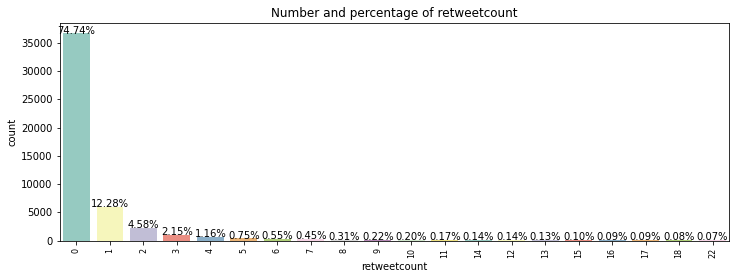

In [15]:
plot_count("retweetcount", "retweetcount", df,3)

C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


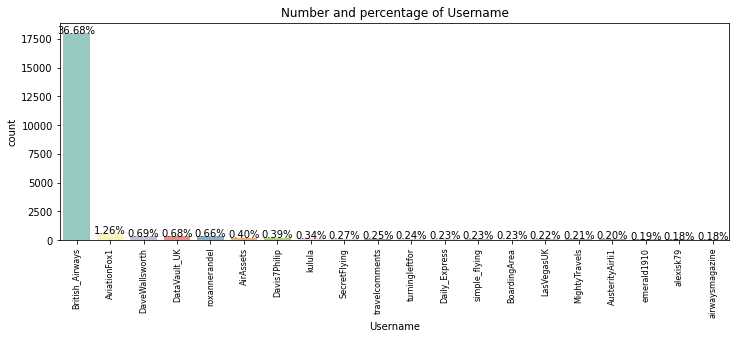

In [16]:
plot_count("Username", "Username", df,3)

C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


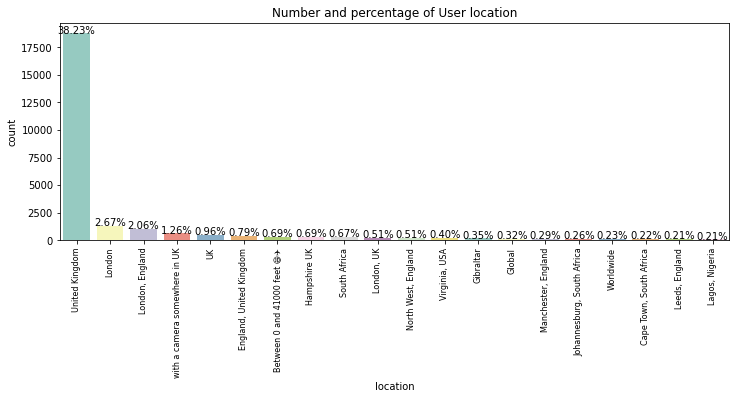

In [17]:
plot_count("location", "User location", df,3)

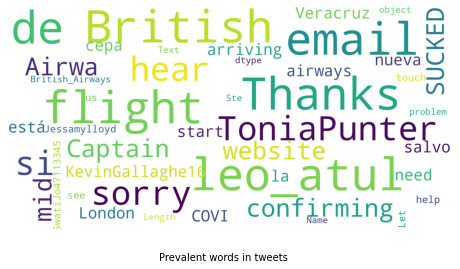

In [18]:
from wordcloud import WordCloud, STOPWORDS

#to get the prevailing works in the tweet
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=10)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

In [19]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    content = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(content)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

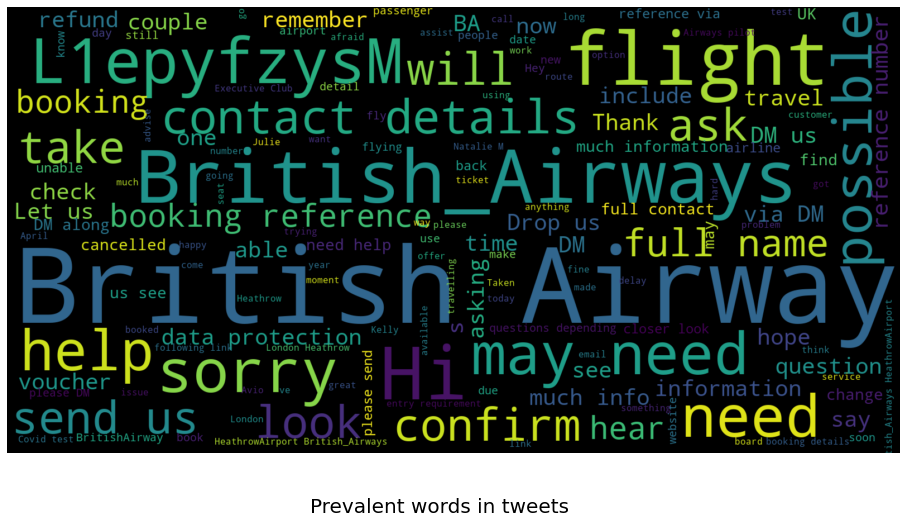

In [20]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

In [21]:
#Code for dropping Columns that may not be useful
df= df.drop(['Username', 'location', 'followers', 'likecount', 'Tweet Id', 'retweetcount'], axis=1)

In [22]:
df.head(10)

Datetime  \
0   2021-06-29 23:56:46+00:00   
2   2021-06-29 23:37:51+00:00   
4   2021-06-29 23:24:33+00:00   
12  2021-06-29 23:02:48+00:00   
13  2021-06-29 22:58:26+00:00   
14  2021-06-29 22:57:04+00:00   
16  2021-06-29 22:54:29+00:00   
17  2021-06-29 22:53:09+00:00   
20  2021-06-29 22:40:43+00:00   
23  2021-06-29 22:30:44+00:00   

                                                 Text  
0   @ToniaPunter We're sorry to hear about your si...  
2   @leo_atul Have you had an email confirming the...  
4   Captain SUCKED OUT mid-flight! | British Airwa...  
12  @leo_atul It's not an email, it's our website....  
13  @KevinGallaghe16 If you are arriving in London...  
14  @ClaireH11195082 Apologies for the delay in ge...  
16  @CalumYoungg Hi Calum. Like other airlines, du...  
17  @JosephVanner Hi Josesph. Send us your booking...  
20  Il y a bien 4 pilotes de British Airways qui s...  
23  @Sombra391 Gosh.. \nI heard that airline repre...

In [23]:
#To use Unsupervised lexicon-based for the Sentiment analysis
#Loading the Vadersentimet Package

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [24]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [25]:
#To test the analyser
sentiment_analyzer_scores("The phone is super cool.")


#testing the function

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [26]:
#To test for intensity of sentenses 
sentiment_analyzer_scores("The phone is super cool!")
sentiment_analyzer_scores("The phone is super cool!!")
sentiment_analyzer_scores("The phone is super cool!!!")
sentiment_analyzer_scores("I would love to watch the magic show again")

The phone is super cool!---------------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
The phone is super cool!!--------------- {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
The phone is super cool!!!-------------- {'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}
I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}


In [27]:
# To tokenise sentences in text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['Text'].apply(tokenizer.tokenize)
words_descriptions.head()

0     [ToniaPunter, We, re, sorry, to, hear, about, ...
2     [leo_atul, Have, you, had, an, email, confirmi...
4     [Captain, SUCKED, OUT, mid, flight, British, A...
12    [leo_atul, It, s, not, an, email, it, s, our, ...
13    [KevinGallaghe16, If, you, are, arriving, in, ...
Name: Text, dtype: object

In [28]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1416908 words total, with a vocabulary size of 91618


In [29]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(20)

[('to', 40384),
 ('t', 34241),
 ('co', 28814),
 ('https', 28771),
 ('the', 28494),
 ('you', 27442),
 ('a', 23782),
 ('and', 19232),
 ('British_Airways', 16226),
 ('for', 15544),
 ('your', 14763),
 ('with', 14013),
 ('British', 14010),
 ('Airways', 13244),
 ('we', 12375),
 ('We', 11275),
 ('can', 11118),
 ('of', 11102),
 ('on', 10868),
 ('I', 10317)]

In [30]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [31]:
## 1-gram tokenizer
example = 'The quick brown fox jumps over the lazy dog.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [32]:
# 2-gram tokenizer

example = 'The quick brown fox jumps over the lazy dog.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('The', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog.')]

In [33]:
#print (sentiment_analyzer_scores(df))
#Applying VADER
df['scores'] = df['Text'].apply(lambda review: analyser.polarity_scores(review))

df.head()

Datetime  \
0   2021-06-29 23:56:46+00:00   
2   2021-06-29 23:37:51+00:00   
4   2021-06-29 23:24:33+00:00   
12  2021-06-29 23:02:48+00:00   
13  2021-06-29 22:58:26+00:00   

                                                 Text  description_lengths  \
0   @ToniaPunter We're sorry to hear about your si...                   51   
2   @leo_atul Have you had an email confirming the...                   13   
4   Captain SUCKED OUT mid-flight! | British Airwa...                   16   
12  @leo_atul It's not an email, it's our website....                   26   
13  @KevinGallaghe16 If you are arriving in London...                   47   

                                               scores  
0   {'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'co...  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4   {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'comp...  
12  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
13  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [34]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

Datetime  \
0   2021-06-29 23:56:46+00:00   
2   2021-06-29 23:37:51+00:00   
4   2021-06-29 23:24:33+00:00   
12  2021-06-29 23:02:48+00:00   
13  2021-06-29 22:58:26+00:00   

                                                 Text  description_lengths  \
0   @ToniaPunter We're sorry to hear about your si...                   51   
2   @leo_atul Have you had an email confirming the...                   13   
4   Captain SUCKED OUT mid-flight! | British Airwa...                   16   
12  @leo_atul It's not an email, it's our website....                   26   
13  @KevinGallaghe16 If you are arriving in London...                   47   

                                               scores  compound  
0   {'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'co...    0.2500  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4   {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'comp...   -0.6155  
12  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
13  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000

In [35]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)

df.head()

Datetime  \
0   2021-06-29 23:56:46+00:00   
2   2021-06-29 23:37:51+00:00   
4   2021-06-29 23:24:33+00:00   
12  2021-06-29 23:02:48+00:00   
13  2021-06-29 22:58:26+00:00   

                                                 Text  description_lengths  \
0   @ToniaPunter We're sorry to hear about your si...                   51   
2   @leo_atul Have you had an email confirming the...                   13   
4   Captain SUCKED OUT mid-flight! | British Airwa...                   16   
12  @leo_atul It's not an email, it's our website....                   26   
13  @KevinGallaghe16 If you are arriving in London...                   47   

                                               scores  compound Sentiment  
0   {'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'co...    0.2500  Positive  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4   {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'comp...   -0.6155  Negative  
12  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
13  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral

C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


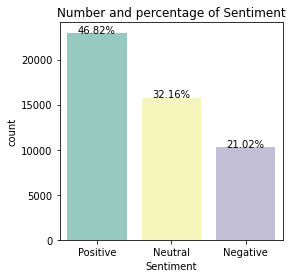

In [36]:
plot_count("Sentiment", "Sentiment", df,1)

In [37]:
df['Datetime'] = pd.to_datetime(df['Datetime'])


#df['Datetime']
#gcmpd = df.groupby('compound')

In [38]:
df['Date'] = df['Datetime'].dt.date

In [39]:
df.head()

Datetime  \
0  2021-06-29 23:56:46+00:00   
2  2021-06-29 23:37:51+00:00   
4  2021-06-29 23:24:33+00:00   
12 2021-06-29 23:02:48+00:00   
13 2021-06-29 22:58:26+00:00   

                                                 Text  description_lengths  \
0   @ToniaPunter We're sorry to hear about your si...                   51   
2   @leo_atul Have you had an email confirming the...                   13   
4   Captain SUCKED OUT mid-flight! | British Airwa...                   16   
12  @leo_atul It's not an email, it's our website....                   26   
13  @KevinGallaghe16 If you are arriving in London...                   47   

                                               scores  compound Sentiment  \
0   {'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'co...    0.2500  Positive   
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
4   {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'comp...   -0.6155  Negative   
12  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
13  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   

          Date  
0   2021-06-29  
2   2021-06-29  
4   2021-06-29  
12  2021-06-29  
13  2021-06-29

In [40]:
#Code for dropping Columns that may not be useful
df= df.drop(['Datetime','Sentiment',  'Text', 'description_lengths', 'scores'], axis=1)

In [41]:
df.head()

compound        Date
0     0.2500  2021-06-29
2     0.0000  2021-06-29
4    -0.6155  2021-06-29
12    0.0000  2021-06-29
13    0.0000  2021-06-29

In [42]:
mean_df= df.groupby(['Date']).mean()

In [43]:
mean_df.head(10)

compound
Date                
2021-01-12  0.014730
2021-01-13  0.146882
2021-01-14  0.201375
2021-01-15  0.223826
2021-01-16  0.214005
2021-01-17  0.114267
2021-01-18  0.250323
2021-01-19  0.195457
2021-01-20  0.166933
2021-01-21  0.165986

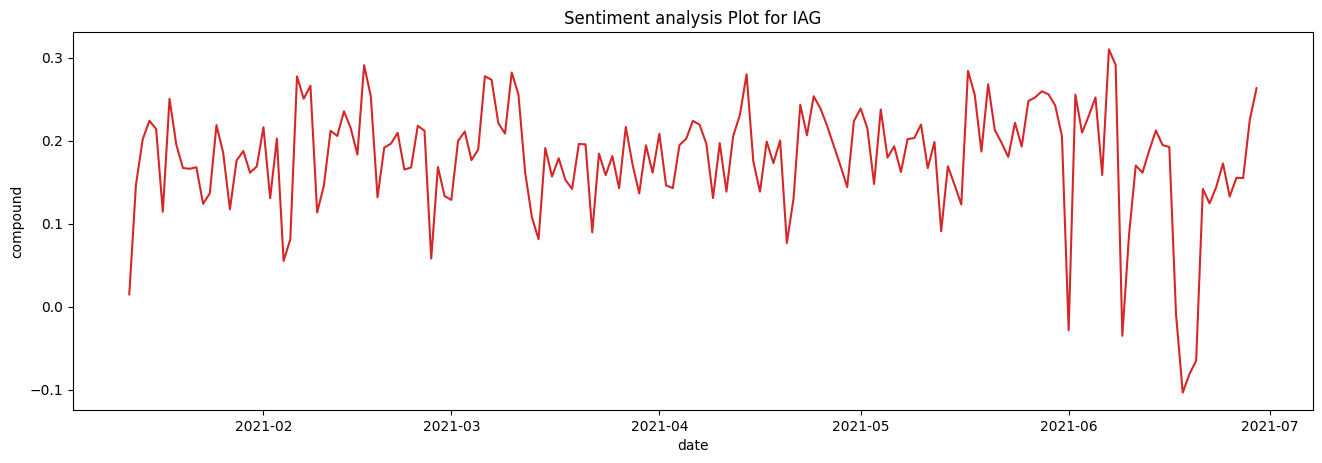

In [45]:
#To plot the Sentiments time series
# Draw Plot
def plot_df(mean_df, x, y, title="", xlabel='date', ylabel='compound', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(mean_df, x=mean_df.index, y=mean_df.compound, title='Sentiment analysis Plot for IAG') 

In [79]:
#To predict the next day price movement
#Loading the appropriate Lib
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_iag = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('British Airways since:2021-06-30 until:2021-07-01').get_items()):
    tweets_iag.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location, tweet.user.followersCount, tweet.likeCount, tweet.retweetCount])
    
# Creating a dataframe from the tweets list above
tweets_iag = pd.DataFrame(tweets_iag, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'location', 'followers', 'likecount', 'retweetcount'])

In [80]:
tweets_iag.head()

Empty DataFrame
Columns: [Datetime, Tweet Id, Text, Username, location, followers, likecount, retweetcount]
Index: []

In [51]:
len(tweets_iag)

878

In [54]:
#To remove tweet from userID will less than 1000 followers
df2= tweets_iag[tweets_iag.followers >=1000]
#df= df[df.likecount >=1]

In [55]:
len(df2)

369

In [56]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    content = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(content)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [57]:
#Code for dropping Columns that may not be useful
df2= df2.drop(['Username', 'location', 'followers', 'likecount', 'Tweet Id', 'retweetcount'], axis=1)

In [58]:
df2.head(10)

Datetime  \
0  2021-06-30 23:55:36+00:00   
2  2021-06-30 23:52:24+00:00   
3  2021-06-30 23:36:30+00:00   
4  2021-06-30 23:35:22+00:00   
5  2021-06-30 23:25:01+00:00   
6  2021-06-30 23:24:13+00:00   
7  2021-06-30 23:22:33+00:00   
8  2021-06-30 23:09:01+00:00   
9  2021-06-30 23:06:22+00:00   
13 2021-06-30 22:44:44+00:00   

                                                 Text  
0   @cf93414681 Apologies for the delay in getting...  
2   @Thissurreymummy Apologies for the delay in re...  
3   @British_Airways hi, do you offer one or two m...  
4   American Airlines, United Airlines, Lufthansa,...  
5   . @British_Airways is the best airline, defini...  
6   @coreyb2342 Let us see how we can help with th...  
7   @RSRMars Which Concorde livery do you prefer s...  
8   Alitalia, British Airways, Gol y Azul suspendi...  
9   Multiple pilot deaths being covered up by airl...  
13  @themajorityscot British Airways Terminal 5 Ge...

In [59]:
#To use Unsupervised lexicon-based for the Sentiment analysis
#Loading the Vadersentimet Package

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [60]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [61]:
# To tokenise sentences in text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df2['Text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [cf93414681, Apologies, for, the, delay, in, g...
2    [Thissurreymummy, Apologies, for, the, delay, ...
3    [British_Airways, hi, do, you, offer, one, or,...
4    [American, Airlines, United, Airlines, Lufthan...
5    [British_Airways, is, the, best, airline, defi...
Name: Text, dtype: object

In [63]:
all_words = [word for tokens in words_descriptions for word in tokens]
df2['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

11847 words total, with a vocabulary size of 2548


In [64]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(1)

[('to', 411)]

In [65]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [66]:
## 1-gram tokenizer
example = 'The quick brown fox jumps over the lazy dog.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())



# 2-gram tokenizer

example = 'The quick brown fox jumps over the lazy dog.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


[('The', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog.')]

In [71]:
#print (sentiment_analyzer_scores(df))
#Applying VADER
df2['scores'] = df2['Text'].apply(lambda review: analyser.polarity_scores(review))

df2.head()

Datetime  \
0 2021-06-30 23:55:36+00:00   
2 2021-06-30 23:52:24+00:00   
3 2021-06-30 23:36:30+00:00   
4 2021-06-30 23:35:22+00:00   
5 2021-06-30 23:25:01+00:00   

                                                Text  description_lengths  \
0  @cf93414681 Apologies for the delay in getting...                   47   
2  @Thissurreymummy Apologies for the delay in re...                   45   
3  @British_Airways hi, do you offer one or two m...                   18   
4  American Airlines, United Airlines, Lufthansa,...                   11   
5  . @British_Airways is the best airline, defini...                   35   

                                              scores  
0  {'neg': 0.051, 'neu': 0.895, 'pos': 0.054, 'co...  
2  {'neg': 0.054, 'neu': 0.89, 'pos': 0.056, 'com...  
3  {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...  
4  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...  
5  {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'comp...

In [76]:
df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2.head()

Datetime  \
0 2021-06-30 23:55:36+00:00   
2 2021-06-30 23:52:24+00:00   
3 2021-06-30 23:36:30+00:00   
4 2021-06-30 23:35:22+00:00   
5 2021-06-30 23:25:01+00:00   

                                                Text  description_lengths  \
0  @cf93414681 Apologies for the delay in getting...                   47   
2  @Thissurreymummy Apologies for the delay in re...                   45   
3  @British_Airways hi, do you offer one or two m...                   18   
4  American Airlines, United Airlines, Lufthansa,...                   11   
5  . @British_Airways is the best airline, defini...                   35   

                                              scores  compound  
0  {'neg': 0.051, 'neu': 0.895, 'pos': 0.054, 'co...    0.0258  
2  {'neg': 0.054, 'neu': 0.89, 'pos': 0.056, 'com...    0.0258  
3  {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...    0.4926  
4  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...    0.4215  
5  {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'comp...    0.9522

In [77]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
df2['Sentiment'] = df2['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df2['Sentiment'] = df2['compound'].apply(Sentimnt)

df2.head()

Datetime  \
0 2021-06-30 23:55:36+00:00   
2 2021-06-30 23:52:24+00:00   
3 2021-06-30 23:36:30+00:00   
4 2021-06-30 23:35:22+00:00   
5 2021-06-30 23:25:01+00:00   

                                                Text  description_lengths  \
0  @cf93414681 Apologies for the delay in getting...                   47   
2  @Thissurreymummy Apologies for the delay in re...                   45   
3  @British_Airways hi, do you offer one or two m...                   18   
4  American Airlines, United Airlines, Lufthansa,...                   11   
5  . @British_Airways is the best airline, defini...                   35   

                                              scores  compound Sentiment  
0  {'neg': 0.051, 'neu': 0.895, 'pos': 0.054, 'co...    0.0258   Neutral  
2  {'neg': 0.054, 'neu': 0.89, 'pos': 0.056, 'com...    0.0258   Neutral  
3  {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...    0.4926  Positive  
4  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...    0.4215  Positive  
5  {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'comp...    0.9522  Positive

C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


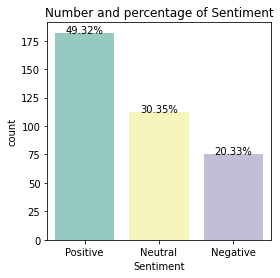

In [78]:
plot_count("Sentiment", "Sentiment", df2,1)

In [21]:
#To test for intensity of sentenses 
sentiment_analyzer_scores("The phone is super cool!")
sentiment_analyzer_scores("The phone is super cool!!")
sentiment_analyzer_scores("The phone is super cool!!!")
sentiment_analyzer_scores("I would love to watch the magic show again")

The phone is super cool!---------------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
The phone is super cool!!--------------- {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
The phone is super cool!!!-------------- {'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}
I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}


In [22]:
# To tokenise sentences in text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['Text'].apply(tokenizer.tokenize)
words_descriptions.head()

0     [Bruselas, abre, una, investigación, sobre, la...
2     [2021, 06, 29, às, 20, horas, Temperatura, 11,...
3     [2021, 06, 29, às, 19, horas, Temperatura, 12,...
5     [IAG, BUY, IAMGOLD, Valuation, Starting, To, G...
11    [twittpeko, Hace, mucho, que, IAG, no, es, eur...
Name: Text, dtype: object

In [23]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

395995 words total, with a vocabulary size of 52676


In [24]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(20)

[('t', 10932),
 ('co', 10620),
 ('https', 10612),
 ('IAG', 9151),
 ('C', 6212),
 ('0', 5272),
 ('de', 4755),
 ('a', 4143),
 ('the', 3620),
 ('2021', 3574),
 ('do', 3489),
 ('to', 3265),
 ('h', 3223),
 ('km', 3221),
 ('Temperatura', 3219),
 ('relativa', 3219),
 ('Velocidade', 3218),
 ('vento', 3218),
 ('Umidade', 3218),
 ('horas', 3049)]

In [25]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [26]:
## 1-gram tokenizer
example = 'The quick brown fox jumps over the lazy dog.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [27]:
# 2-gram tokenizer

example = 'The quick brown fox jumps over the lazy dog.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('The', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog.')]

In [28]:
#print (sentiment_analyzer_scores(df))
#Applying VADER
df['scores'] = df['Text'].apply(lambda review: analyser.polarity_scores(review))

df.head()

Datetime             Tweet Id  \
0   2021-06-29 23:37:56+00:00  1410019736688148484   
2   2021-06-29 23:10:40+00:00  1410012871916933122   
3   2021-06-29 23:10:01+00:00  1410012709215784961   
5   2021-06-29 22:21:59+00:00  1410000622804475909   
11  2021-06-29 21:46:41+00:00  1409991737167261701   

                                                 Text  description_lengths  \
0   Bruselas abre una investigación sobre la compr...                   22   
2   2021-06-29 às 20 horas : Temperatura: 11,5°C; ...                   20   
3   2021-06-29 às 19 horas : Temperatura: 12,0°C; ...                   20   
5   $IAG BUY\n\nIAMGOLD: Valuation Starting To Get...                   13   
11  @twittpeko Hace mucho que IAG no es europea. S...                   18   

                                               scores  
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
5   {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...  
11  {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...

In [29]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

Datetime             Tweet Id  \
0   2021-06-29 23:37:56+00:00  1410019736688148484   
2   2021-06-29 23:10:40+00:00  1410012871916933122   
3   2021-06-29 23:10:01+00:00  1410012709215784961   
5   2021-06-29 22:21:59+00:00  1410000622804475909   
11  2021-06-29 21:46:41+00:00  1409991737167261701   

                                                 Text  description_lengths  \
0   Bruselas abre una investigación sobre la compr...                   22   
2   2021-06-29 às 20 horas : Temperatura: 11,5°C; ...                   20   
3   2021-06-29 às 19 horas : Temperatura: 12,0°C; ...                   20   
5   $IAG BUY\n\nIAMGOLD: Valuation Starting To Get...                   13   
11  @twittpeko Hace mucho que IAG no es europea. S...                   18   

                                               scores  compound  
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
5   {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.4019  
11  {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...   -0.2960

In [30]:
df['Datetime'] = pd.to_datetime(df['Datetime'])


#df['Datetime']
#gcmpd = df.groupby('compound')

In [31]:
df['date'] = df['Datetime'].dt.date

In [32]:
df.head()

Datetime             Tweet Id  \
0  2021-06-29 23:37:56+00:00  1410019736688148484   
2  2021-06-29 23:10:40+00:00  1410012871916933122   
3  2021-06-29 23:10:01+00:00  1410012709215784961   
5  2021-06-29 22:21:59+00:00  1410000622804475909   
11 2021-06-29 21:46:41+00:00  1409991737167261701   

                                                 Text  description_lengths  \
0   Bruselas abre una investigación sobre la compr...                   22   
2   2021-06-29 às 20 horas : Temperatura: 11,5°C; ...                   20   
3   2021-06-29 às 19 horas : Temperatura: 12,0°C; ...                   20   
5   $IAG BUY\n\nIAMGOLD: Valuation Starting To Get...                   13   
11  @twittpeko Hace mucho que IAG no es europea. S...                   18   

                                               scores  compound        date  
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  2021-06-29  
2   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  2021-06-29  
3   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  2021-06-29  
5   {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.4019  2021-06-29  
11  {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...   -0.2960  2021-06-29

In [33]:
#Code for dropping Columns that may not be useful
df= df.drop(['Datetime', 'Tweet Id', 'Text', 'scores'], axis=1)

In [34]:
df.head(20)

description_lengths  compound        date
0                    22    0.0000  2021-06-29
2                    20    0.0000  2021-06-29
3                    20    0.0000  2021-06-29
5                    13    0.4019  2021-06-29
11                   18   -0.2960  2021-06-29
14                   20    0.0000  2021-06-29
15                    5    0.4215  2021-06-29
17                   20    0.0000  2021-06-29
18                   26    0.4019  2021-06-29
20                   15    0.4019  2021-06-29
22                   23    0.0000  2021-06-29
26                   37    0.0000  2021-06-29
28                   48    0.0000  2021-06-29
29                   30   -0.2960  2021-06-29
33                   46    0.0000  2021-06-29
34                   61    0.0000  2021-06-29
35                   40    0.0000  2021-06-29
38                   15    0.0000  2021-06-29
43                   19    0.0000  2021-06-29
46                   38   -0.5574  2021-06-29

In [35]:
mean_df= df.groupby(['date']).mean()

In [39]:
mean_df.tail(50)

description_lengths  compound
date                                     
2021-05-11            23.338308  0.026779
2021-05-12            21.096552  0.087908
2021-05-13            21.693878  0.106059
2021-05-14            19.918367  0.069557
2021-05-15            18.444444  0.114076
2021-05-16            21.062500  0.000184
2021-05-17            20.373016  0.046995
2021-05-18            22.883562 -0.001589
2021-05-19            23.530000  0.041579
2021-05-20            21.518987  0.070047
2021-05-21            22.386364  0.011120
2021-05-22            16.472973  0.043858
2021-05-23            17.921875  0.059394
2021-05-24            19.637931  0.087652
2021-05-25            21.558824  0.077963
2021-05-26            23.637097  0.081783
2021-05-27            21.797753  0.017519
2021-05-28            21.540541  0.061549
2021-05-29            15.231579  0.076232
2021-05-30            18.606061  0.071386
2021-05-31            19.229885  0.053101
2021-06-01            23.759615  0.041428
2021-06-02            22.987179  0.059124
2021-06-03            23.058824  0.043966
2021-06-04            22.464286  0.079295
2021-06-05            23.230769  0.056577
2021-06-06            18.783784  0.111745
2021-06-07            21.961538  0.054844
2021-06-08            23.842857  0.114376
2021-06-09            21.432000  0.041542
2021-06-10            21.779661  0.142566
2021-06-11            23.539683  0.138279
2021-06-12            18.469388  0.045396
2021-06-13            18.245283  0.044066
2021-06-14            24.962687 -0.020679
2021-06-15            21.875000  0.051811
2021-06-16            26.709091  0.095565
2021-06-17            21.943548  0.003785
2021-06-18            24.601770  0.014275
2021-06-19            19.730159 -0.015713
2021-06-20            21.659574  0.022472
2021-06-21            19.517647  0.074580
2021-06-22            20.123810  0.124973
2021-06-23            20.746835  0.095910
2021-06-24            23.726190  0.159764
2021-06-25            26.375000  0.043590
2021-06-26            22.236364  0.039844
2021-06-27            18.209302  0.056177
2021-06-28            25.269231  0.024373
2021-06-29            23.167939  0.062333

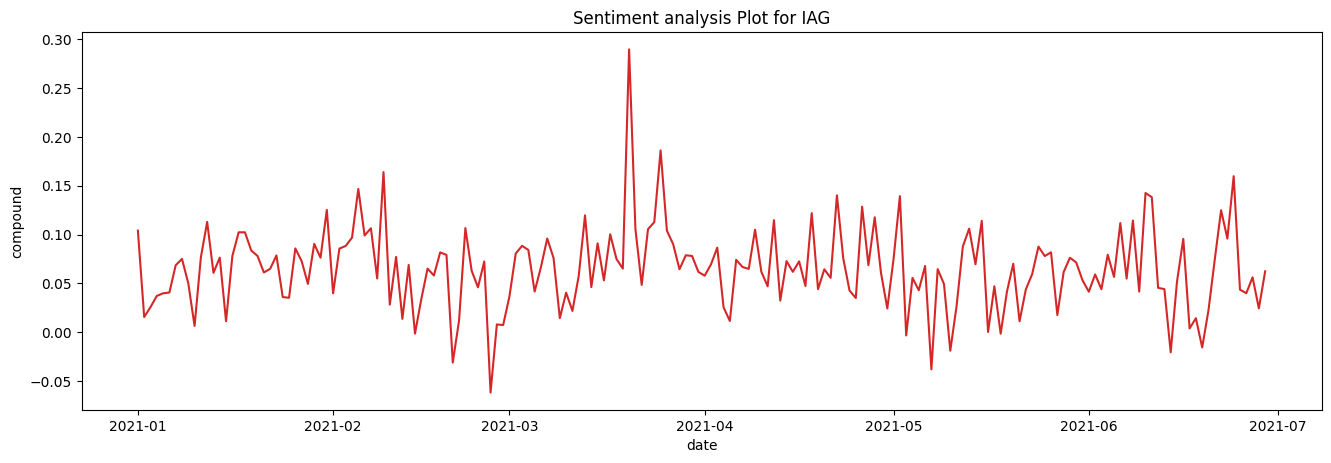

In [40]:
#To plot the Sentiments time series
# Draw Plot
def plot_df(mean_df, x, y, title="", xlabel='date', ylabel='compound', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(mean_df, x=mean_df.index, y=mean_df.compound, title='Sentiment analysis Plot for IAG') 